In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cd drive/My Drive/algorithmtrading/pair_trading

[Errno 2] No such file or directory: 'drive/My Drive/algorithmtrading/pair_trading'
/content/drive/My Drive/algorithmtrading/pair_trading


In [ ]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin:end]

# - 과거 1분단위 데이터 받아오기

In [ ]:
now = '20210109'

kodex200 = pd.read_pickle('kodex200_'+now)
kodex_inv = pd.read_pickle('kodexinv_'+now)

temp =  pd.merge(left = kodex200 , right = kodex_inv, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['kodex200','volume','kodex_inv','volume']
temp = temp[['kodex200','kodex_inv']]

temp['kodex200']=pd.to_numeric(temp['kodex200'])
temp['kodex_inv']=pd.to_numeric(temp['kodex_inv'])
temp['kodex_inv'] = temp['kodex_inv']*11
temp['spread'] = temp['kodex200'] + temp['kodex_inv']
temp['ma60_spread'] = temp['spread'].rolling(window=60, center=False).mean()

temp

,kodex200,kodex_inv,spread,ma60_spread
체결시간,,,,
20201223090002,36785,50490,87275,nan
20201223090002,36785,50490,87275,nan
20201223090002,36780,50490,87270,nan
20201223090002,36780,50490,87270,nan
20201223090002,36775,50490,87265,nan
...,...,...,...,...
20210108151951,43590,42350,85940,85919.083333
20210108151954,43590,42350,85940,85919.583333
20210108151956,43590,42350,85940,85920.000000


# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [ ]:
df = {}
calender = []
for date in range(20210101,20210109):
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        # ratio  = int((temps['kodex200'] / temps['kodex_inv']).mean)
        temps['ma60_mean'] = temps['spread'].rolling(window=60, center=False).mean()
        temps['ma60_std'] = temps['spread'].rolling(window=60, center=False).std()
        temps['ma60_zscore'] = (temps['spread'] - temps['ma60_mean']) / temps['ma60_std']
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

20210101 는 공휴일 입니다.
20210102 는 공휴일 입니다.
20210103 는 공휴일 입니다.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

['20210104', '20210105', '20210106', '20210107', '20210108']

# 그래프 그리기

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

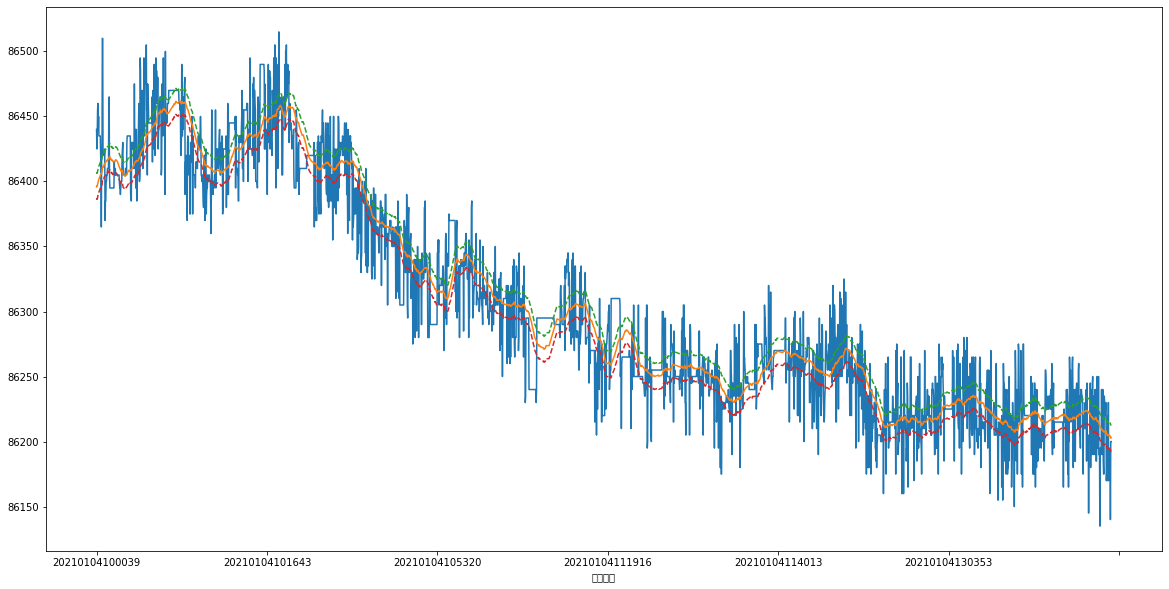

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

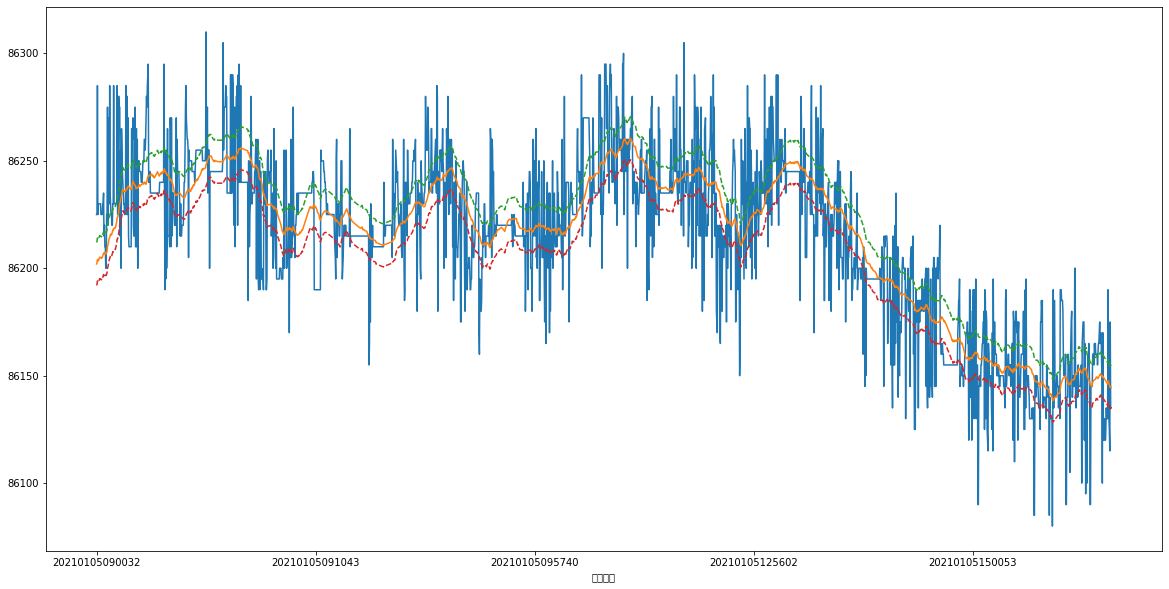

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

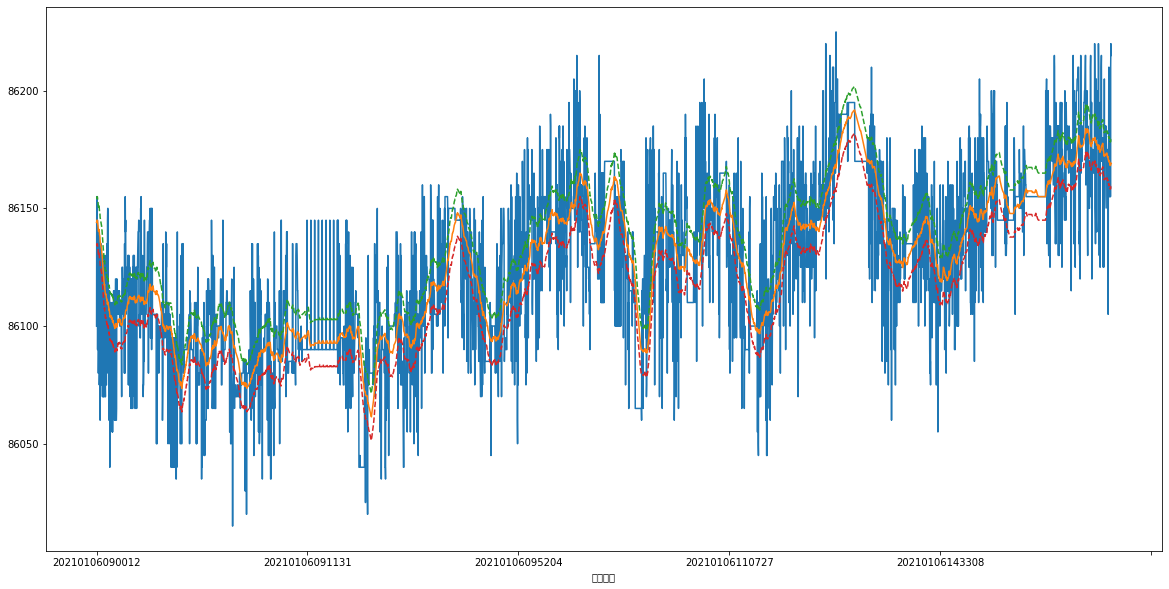

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

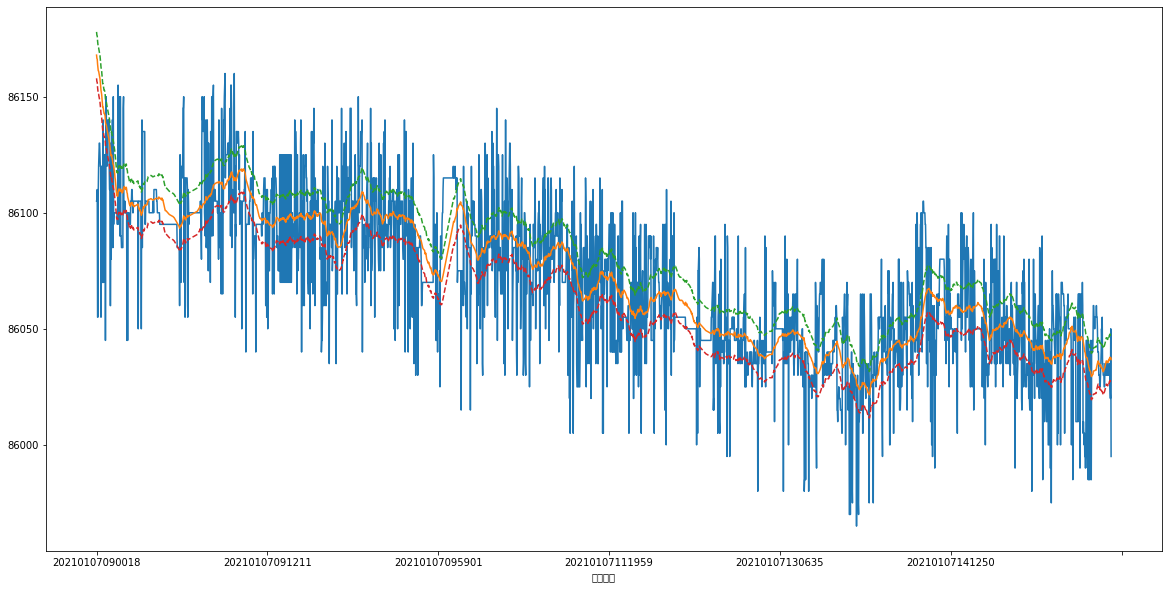

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

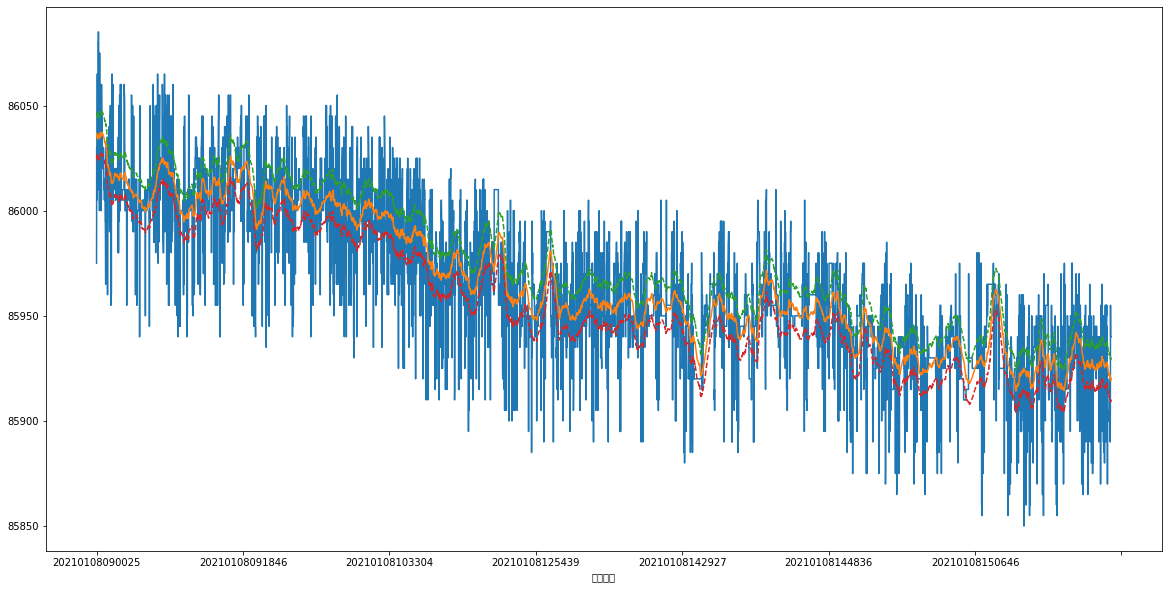

In [ ]:
for date in calender:
    plt.rcParams["figure.figsize"] = (20, 10)
    df[date]['spread'].plot()
    df[date]['ma60_spread'].plot()
    temp_high = df[date]['ma60_spread'] +10
    temp_low = df[date]['ma60_spread']-10
    temp_high.plot(linestyle='--')
    temp_low.plot(linestyle='--')
    # df[date]['kodex200'].plot()
    # df[date]['kodex_inv'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

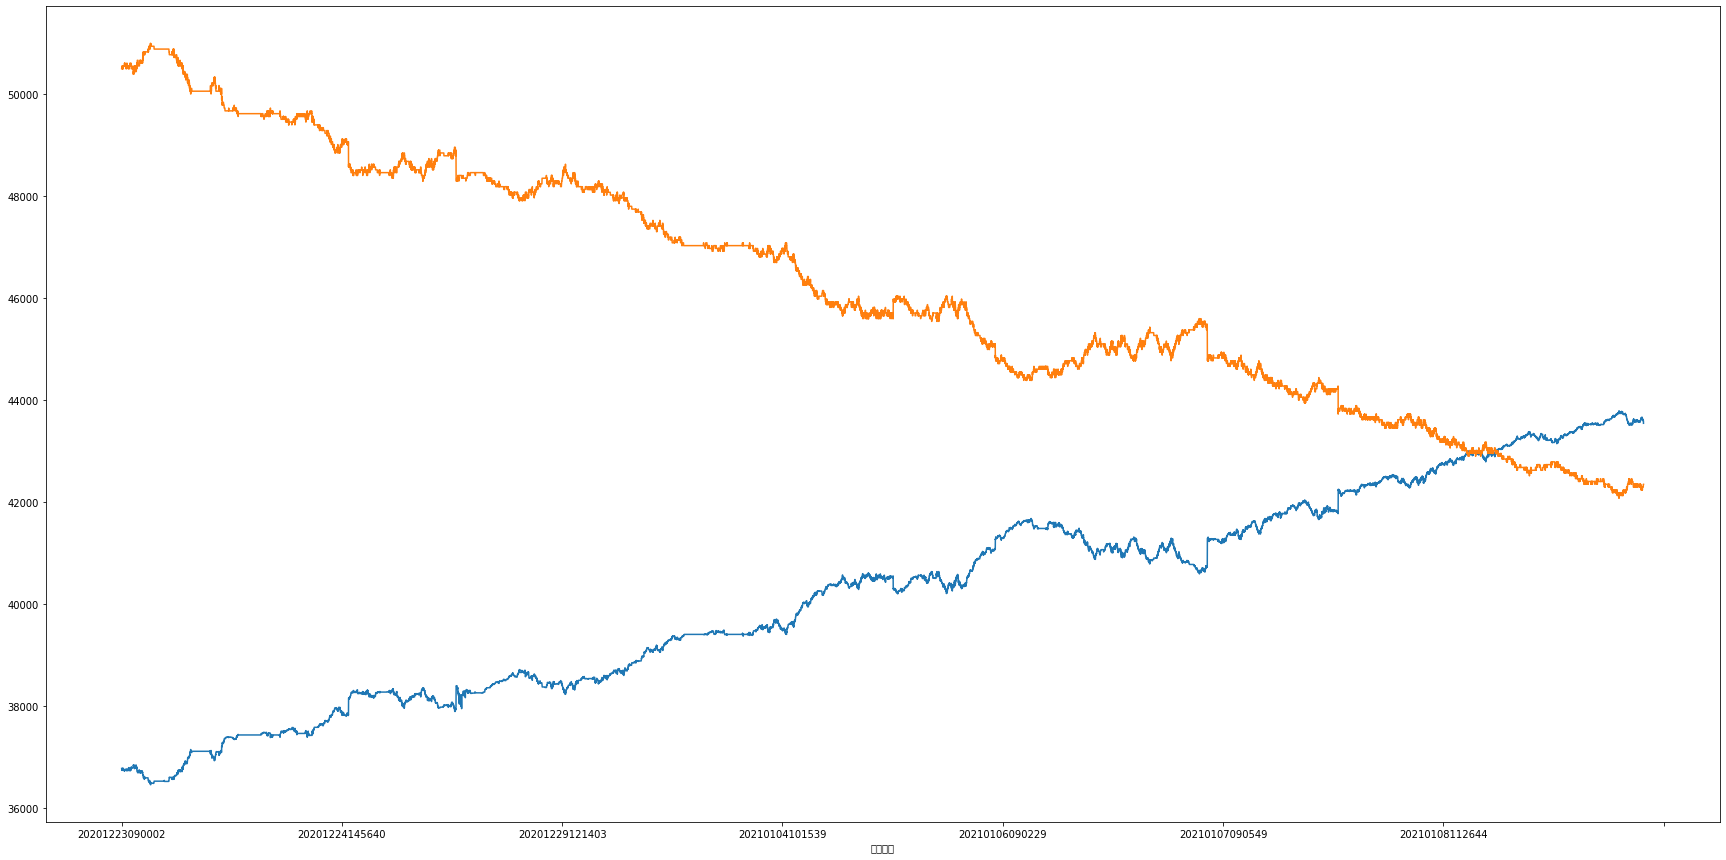

In [ ]:
plt.rcParams["figure.figsize"] = (30, 15)
# temp['kodex200_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['tiger_active_cumret'].plot()
temp['kodex200'].plot()
temp['kodex_inv'].plot()
# temp['ma30'].plot()

# 4. 스프레드 확인

In [4]:
cd bidask

/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [69]:
now = '20210125'

kodex_active_bidask = pd.read_pickle('KODEX 혁신기술테마액티브_'+now)
kodex200_bidask = pd.read_pickle('KODEX 200_'+now)

kodex_active_bidask = kodex_active_bidask.reset_index()[['bid','ask']]
kodex200_bidask = kodex200_bidask.reset_index()[['bid','ask']]

bidask = pd.concat([kodex_active_bidask,kodex200_bidask],axis=1)
# bidask =  pd.merge(left = kodex_active_bidask , right = kodex200_bidask, how = "outer", on = "time")
bidask.columns = ['kodex_active_bid','kodex_active_ask','kodex200_bid','kodex200_ask']
bidask['kodex_active_ask'] = bidask['kodex_active_ask'] *3
bidask['kodex_active_bid'] = bidask['kodex_active_bid'] *3
kodex_active_ask = bidask['kodex_active_ask']
kodex_active_bid = bidask['kodex_active_bid']
kodex200_ask = bidask['kodex200_ask']
kodex200_bid = bidask['kodex200_bid']
bidask

,kodex_active_bid,kodex_active_ask,kodex200_bid,kodex200_ask
0,41805,41685,43780,43770
1,41820,41685,43780,43770
2,41820,41685,43780,43775
3,41820,41685,43785,43775
4,41805,41685,43790,43785
...,...,...,...,...
7137,42270,42105,44280,44275
7138,42270,42135,44280,44275
7139,42270,42135,44280,44275
7140,42270,42135,44280,44275


## - bidask 스프레드

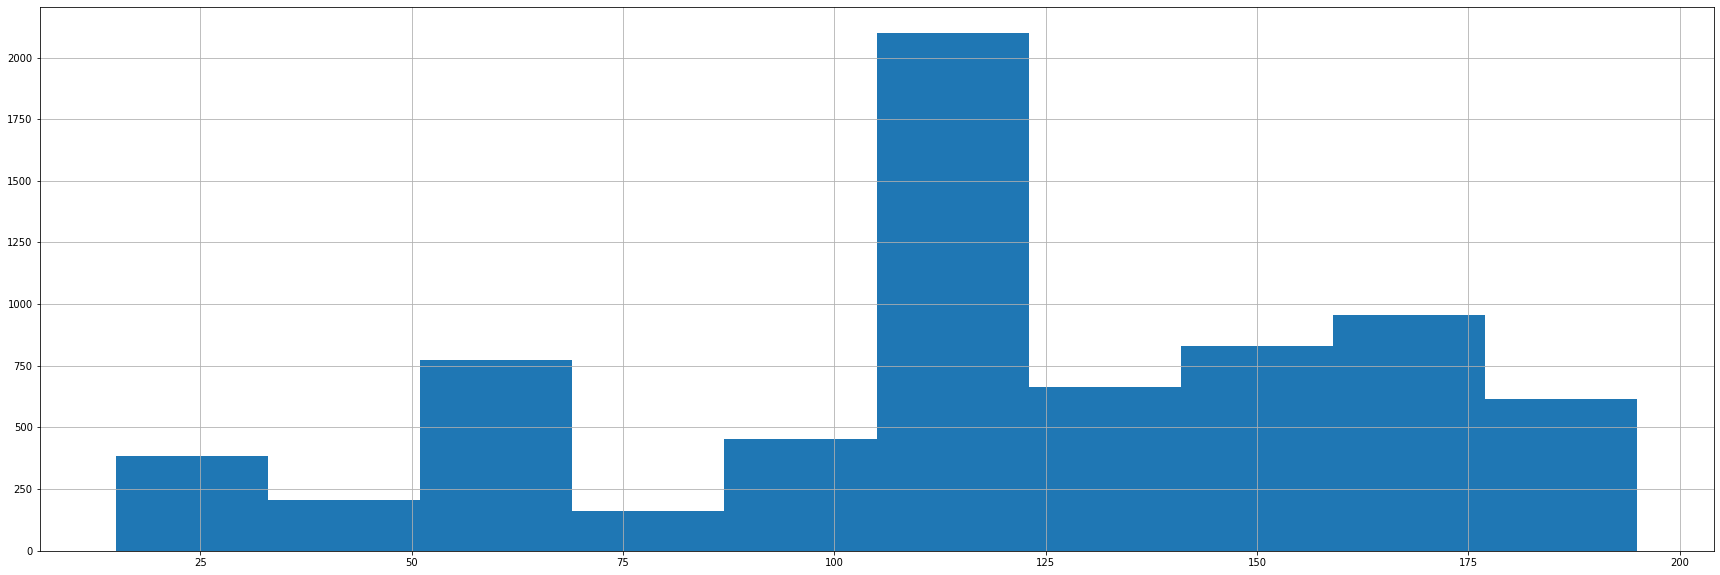

In [70]:
plt.rcParams["figure.figsize"] = (30, 10)
bidask_spread = kodex_active_bid-kodex_active_ask
bidask_spread.hist()

# kodex200_ask_kodex_active_bid spread freaquency    (청산포지션)

-2155    528
-2160    477
-2165    421
-2145    418
-2135    417
-2140    404
-2180    394
-2150    389
-2175    387
-2185    384
-2170    383
-2130    334
-2190    290
-2125    256
-2195    221
-2120    178
-2110    141
-2100    126
-2105    120
-2115    118
-2200     78
-2095     67
-2090     53
-2080     47
-2070     41
-2085     40
-2040     39
-2075     39
-2205     37
-2045     37
dtype: int64


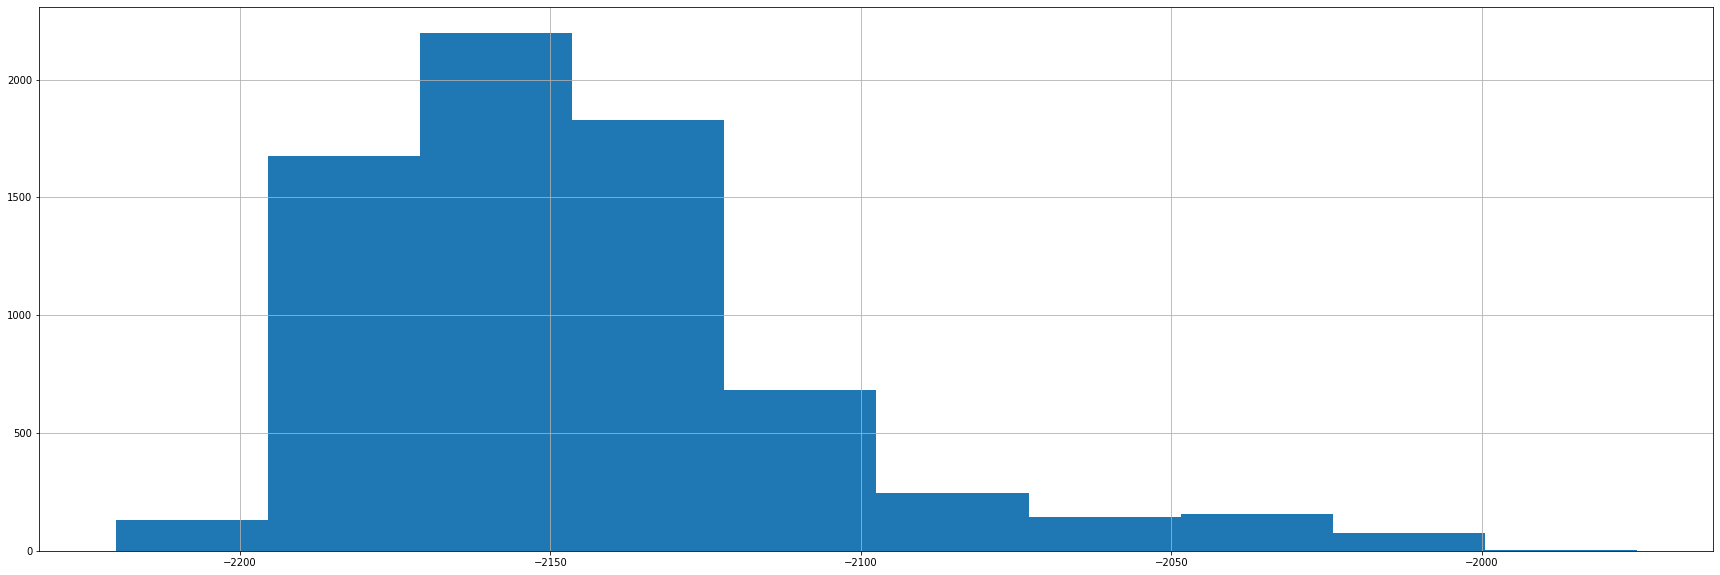

In [71]:
finish = kodex_active_ask - kodex200_bid
finish.hist()
finish = finish.value_counts() 
print(finish[:30])

# kodex_active_ask_kodex200_bid spread freaquency (포지션시작)

2005    489
2010    479
2000    413
1995    385
2015    364
1985    325
1980    312
1990    311
2020    293
2025    212
1975    211
1970    183
2055    177
2030    176
2040    161
2035    158
2070    153
1965    145
2050    138
2120    133
1960    127
2045    123
2060    121
2075    121
2095    119
2090    115
2065    112
2105    109
1955    107
2115    100
dtype: int64


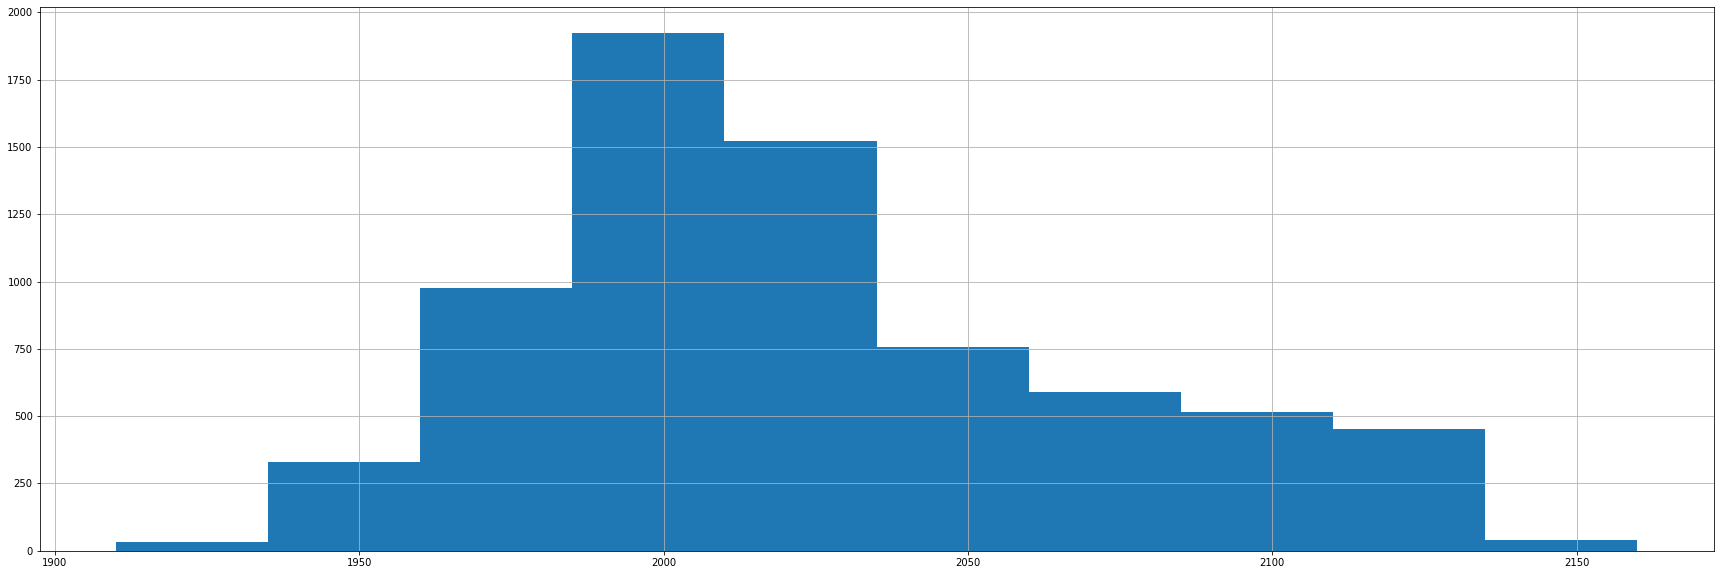

In [72]:
start = kodex200_ask - kodex_active_bid
start.hist()
start = start.value_counts() 
print(start[:30])

In [ ]:
kodex_active_bidask.plot()

# 시뮬레이션

In [55]:
profit = 0
profits = {}

kodex200 = 30
kodex_active = 30

init = 30

lev = 1

spread_start = list(map(int,start.index))
spread_finish = list(map(int,finish.index))


for j in spread_start[:30]:
    for k in spread_finish[:30]:
        if j + k <= 0:
            continue
        profit = 0
        t = 0
        check = None
        kodex200 = 30
        kodex_active = 30
        for i in range(len(bidask)):
            if bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= j and init <=kodex_active<= init*2-lev:
                kodex200 -= lev
                kodex_active += lev
                profit += bidask['kodex200_ask'].iloc[i]*lev - bidask['kodex_active_bid'].iloc[i]*lev
                print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'short'
            if bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= k and kodex_active > init and check == 'short':
                profit += bidask['kodex_active_ask'].iloc[i]*(kodex_active - init) - bidask['kodex200_bid'].iloc[i]*(kodex_active-init)
                kodex_active = init
                kodex200 = init
                print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)       
                t += 2


            if bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= k and init<= kodex200<=init*2-lev:
                kodex200 += lev
                kodex_active -= lev
                profit += bidask['kodex_active_ask'].iloc[i]*lev - bidask['kodex200_bid'].iloc[i]*lev
                print('longstart',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'long'
            if bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= j and kodex200 > init and check == 'long':
                profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['kodex_active_bid'].iloc[i]*(kodex200-init)
                kodex_active = init
                kodex200 = init
                print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)       
                t += 2
        
        if check == 'short':
            profit += bidask['kodex_active_ask'].iloc[-1]*(kodex_active - init) - bidask['kodex200_bid'].iloc[-1]*(kodex_active-init)
            print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit) 
        if check == 'long':
            profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['kodex_active_bid'].iloc[i]*(kodex200-init)
            print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)     

        profits[(j,k,t)] = profit - t*6
        print('-------------------------------------------------------------------------------------------------------------------')

profits = sorted(profits.items(), key=lambda x: x[1], reverse=True)
profits[:20]

Streaming output truncated to the last 5000 lines.
longstart 7126 번째거래 /    ask: 41490   bid: 43470   profit: -50235
longstart 7127 번째거래 /    ask: 41490   bid: 43470   profit: -52215
longfinish 7960 번째거래 /    ask: 43260   bid: 41400   profit: 3585
-------------------------------------------------------------------------------------------------------------------
longstart 0 번째거래 /    ask: 41550   bid: 43525   profit: -1975
longstart 1 번째거래 /    ask: 41550   bid: 43525   profit: -3950
longstart 2 번째거래 /    ask: 41550   bid: 43520   profit: -5920
longstart 3 번째거래 /    ask: 41550   bid: 43515   profit: -7885
longstart 4 번째거래 /    ask: 41550   bid: 43515   profit: -9850
longstart 5 번째거래 /    ask: 41550   bid: 43510   profit: -11810
longstart 6 번째거래 /    ask: 41550   bid: 43500   profit: -13760
longstart 7 번째거래 /    ask: 41550   bid: 43500   profit: -15710
longstart 8 번째거래 /    ask: 41550   bid: 43495   profit: -17655
longstart 9 번째거래 /    ask: 41550   bid: 43495   profit: -19600
longstart 1

[((1985, -1940, 482), 6738),
 ((1980, -1940, 492), 6633),
 ((1985, -1945, 504), 6271),
 ((1990, -1940, 406), 6154),
 ((1980, -1945, 514), 6151),
 ((1975, -1940, 508), 6032),
 ((1990, -1945, 428), 5922),
 ((2000, -1955, 478), 5847),
 ((1985, -1950, 526), 5624),
 ((2000, -1960, 508), 5592),
 ((1995, -1940, 360), 5565),
 ((1990, -1950, 450), 5540),
 ((1980, -1950, 536), 5489),
 ((1975, -1945, 540), 5470),
 ((1995, -1955, 508), 5357),
 ((1995, -1945, 382), 5333),
 ((2000, -1940, 330), 5310),
 ((1990, -1955, 554), 5296),
 ((2000, -1945, 352), 5133),
 ((1995, -1960, 538), 4992)]

In [73]:
profit = 0
profits = {}

kodex200 = 30
kodex_active = 30

init = 30

lev = 1

profit = 0
t = 0
check = None

j = 1985
k = -1940
for i in range(len(bidask)):
    if bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= j and init <=kodex_active<= init*2-lev:
        kodex200 -= lev
        kodex_active += lev
        profit += bidask['kodex200_ask'].iloc[i]*lev - bidask['kodex_active_bid'].iloc[i]*lev
        print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)
        print(kodex200,kodex_active)
        t += 2
        check = 'short'
    if bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= k and kodex_active > init and check == 'short':
        profit += bidask['kodex_active_ask'].iloc[i]*(kodex_active - init) - bidask['kodex200_bid'].iloc[i]*(kodex_active-init)
        kodex_active = init
        kodex200 = init
        print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)       
        t += 2


    if bidask['kodex_active_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= k and init<= kodex200<=init*2-lev:
        kodex200 += lev
        kodex_active -= lev
        profit += bidask['kodex_active_ask'].iloc[i]*lev - bidask['kodex200_bid'].iloc[i]*lev
        print('longstart',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)
        print(kodex200,kodex_active)
        t += 2
        check = 'long'
    if bidask['kodex200_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= j and kodex200 > init and check == 'long':
        profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['kodex_active_bid'].iloc[i]*(kodex200-init)
        kodex_active = init
        kodex200 = init
        print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)       
        t += 2

if check == 'short':
    profit += bidask['kodex_active_ask'].iloc[-1]*(kodex_active - init) - bidask['kodex200_bid'].iloc[-1]*(kodex_active-init)
    print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit) 
    print(kodex200,kodex_active)
if check == 'long':
    profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['kodex_active_bid'].iloc[i]*(kodex200-init)
    print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)    
    print(kodex200,kodex_active)
print(profit)

shortstart 8 번째거래 /    ask: 43790   bid: 41805   profit: 1985
29 31
shortstart 12 번째거래 /    ask: 43780   bid: 41790   profit: 3975
28 32
shortstart 30 번째거래 /    ask: 43785   bid: 41790   profit: 5970
27 33
shortstart 31 번째거래 /    ask: 43775   bid: 41790   profit: 7955
26 34
shortstart 32 번째거래 /    ask: 43775   bid: 41790   profit: 9940
25 35
shortstart 39 번째거래 /    ask: 43785   bid: 41790   profit: 11935
24 36
shortstart 44 번째거래 /    ask: 43775   bid: 41790   profit: 13920
23 37
shortstart 45 번째거래 /    ask: 43785   bid: 41790   profit: 15915
22 38
shortstart 47 번째거래 /    ask: 43795   bid: 41805   profit: 17905
21 39
shortstart 48 번째거래 /    ask: 43800   bid: 41805   profit: 19900
20 40
shortstart 52 번째거래 /    ask: 43775   bid: 41790   profit: 21885
19 41
shortstart 55 번째거래 /    ask: 43795   bid: 41805   profit: 23875
18 42
shortstart 60 번째거래 /    ask: 43800   bid: 41805   profit: 25870
17 43
shortstart 65 번째거래 /    ask: 43795   bid: 41805   profit: 27860
16 44
shortstart 66 번째거래 /    as

In [74]:
59740 -1940*30

1540

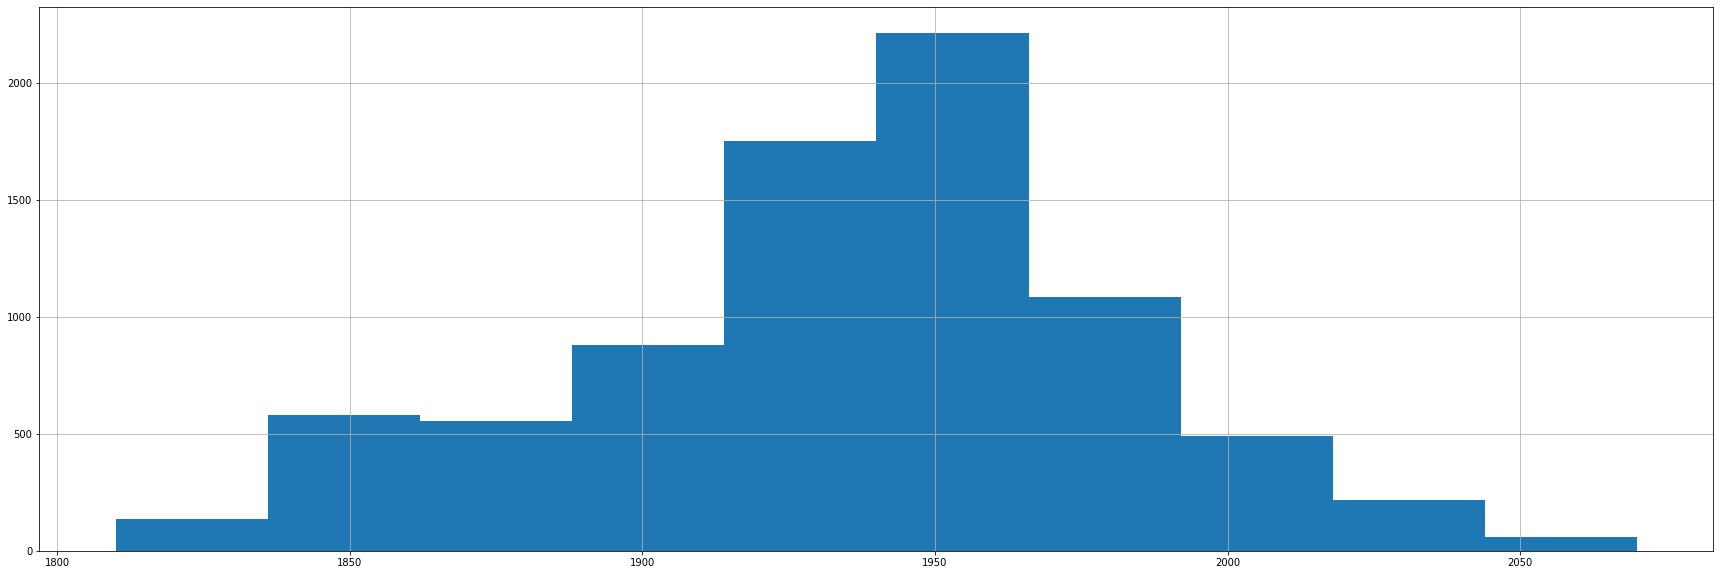

In [68]:
start = kodex200_ask - kodex_active_bid
start.hist()

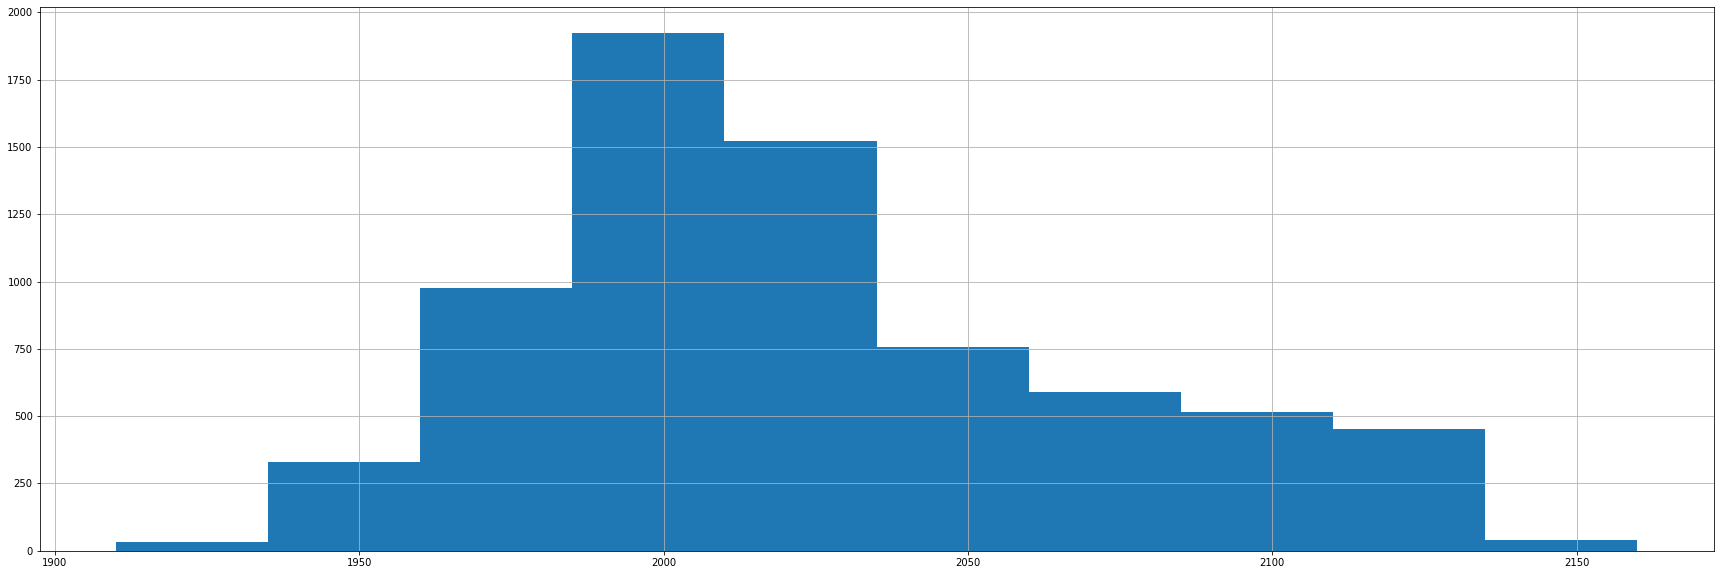

In [75]:
start = kodex200_ask - kodex_active_bid
start.hist()

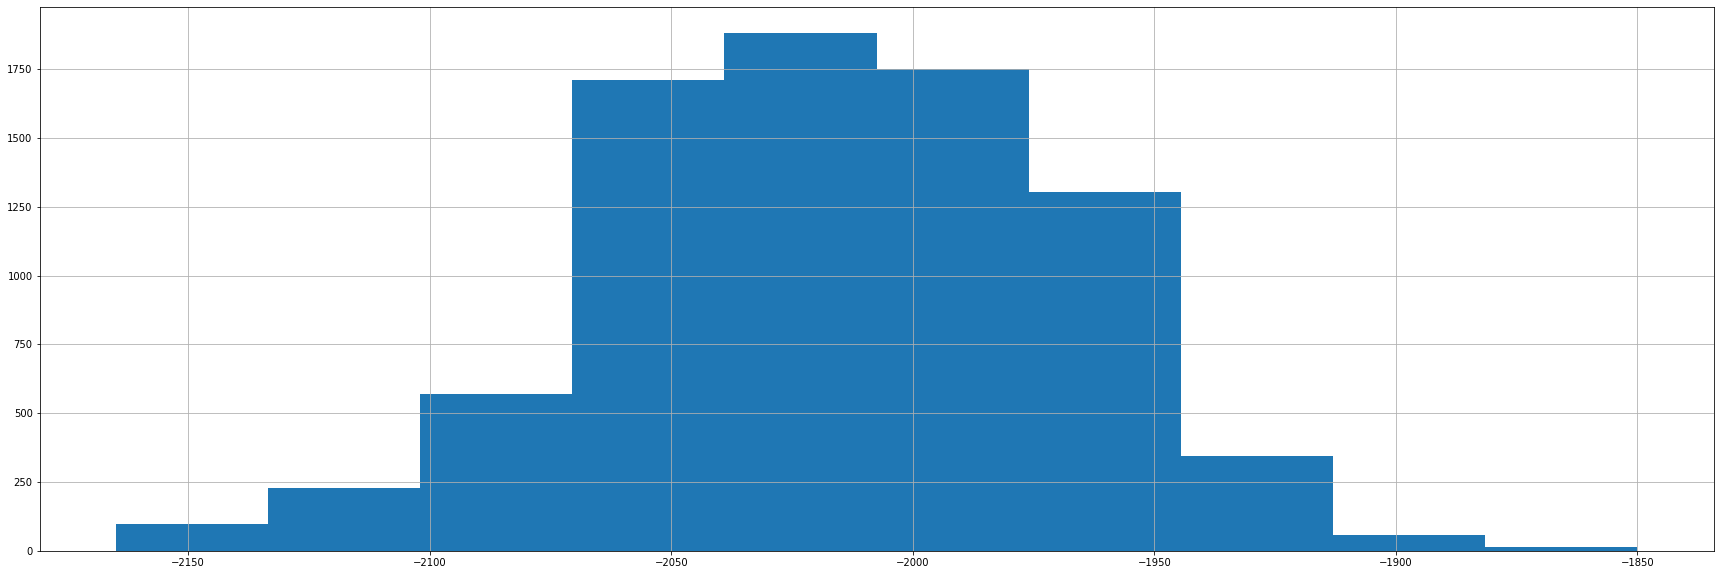

In [67]:
finish = kodex_active_ask - kodex200_bid
finish.hist()

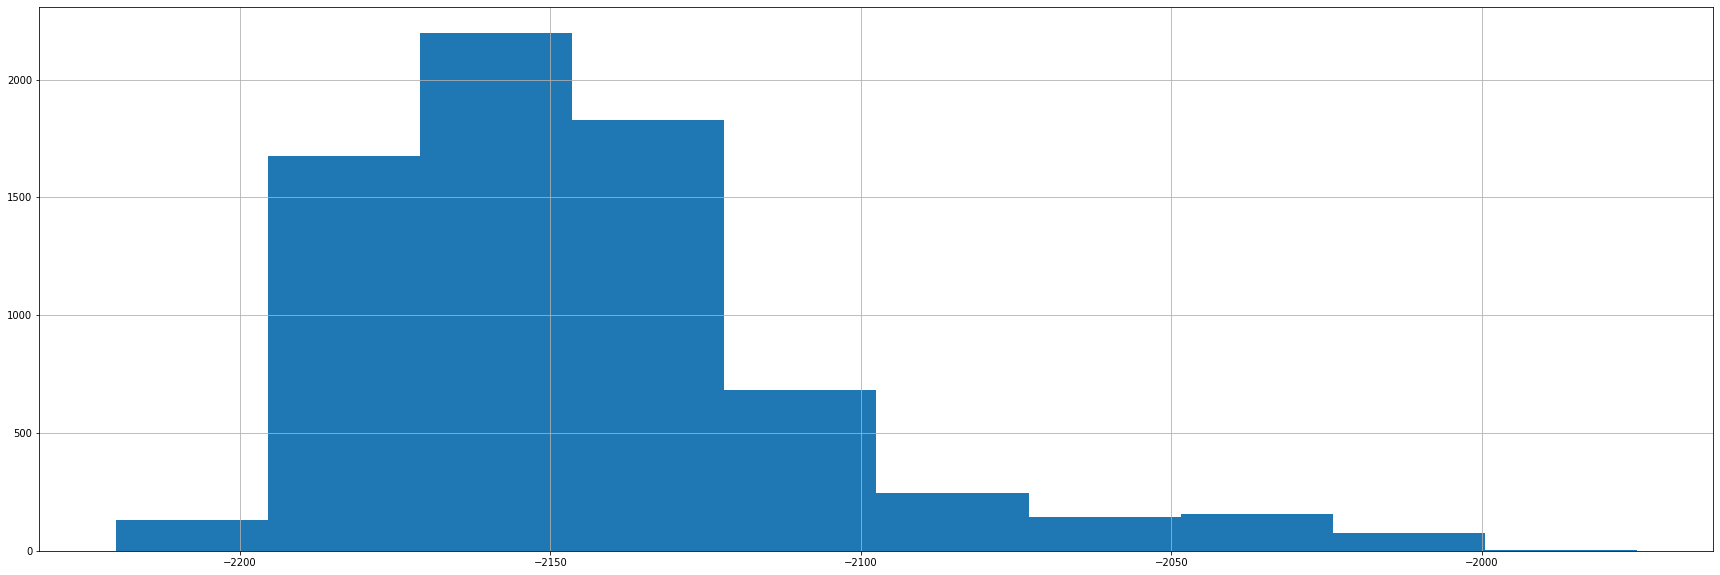

In [76]:
finish = kodex_active_ask - kodex200_bid
finish.hist()

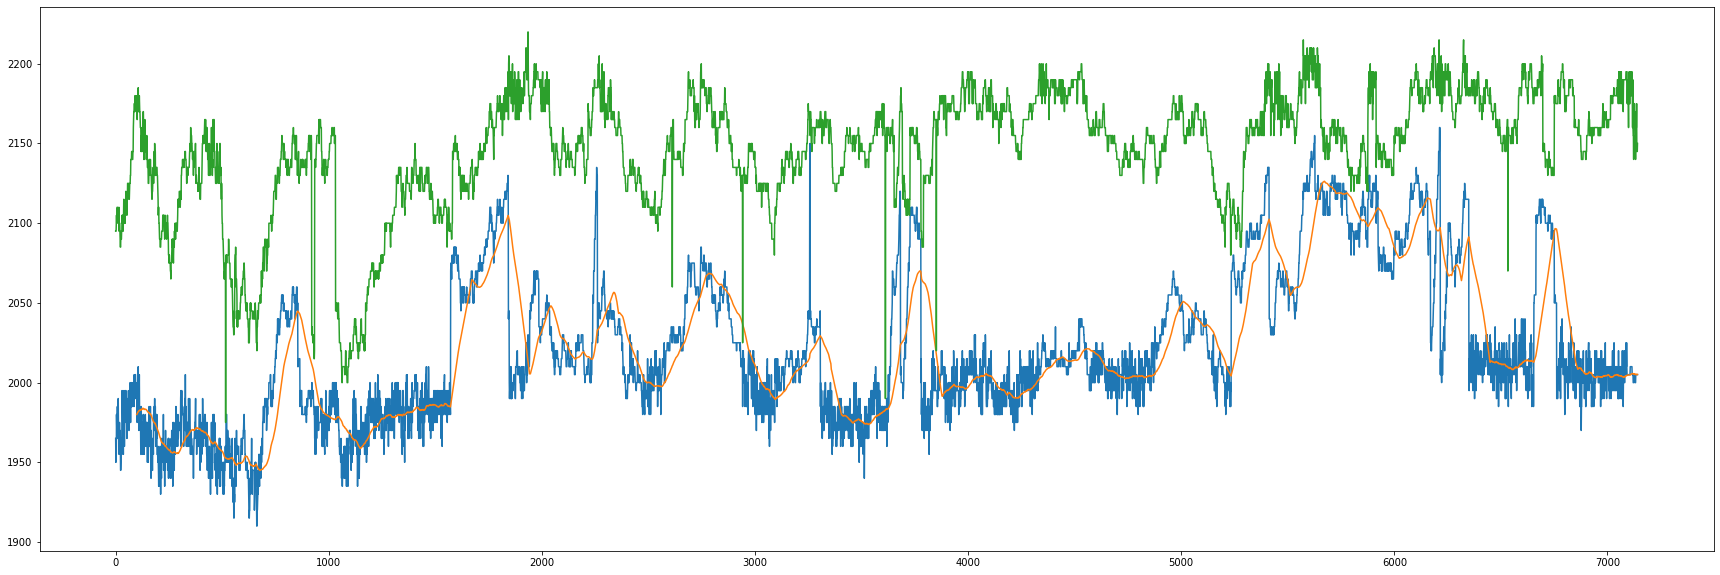

In [88]:
start.plot()
(start.rolling(window = 100).mean()).plot()

(-finish).plot()

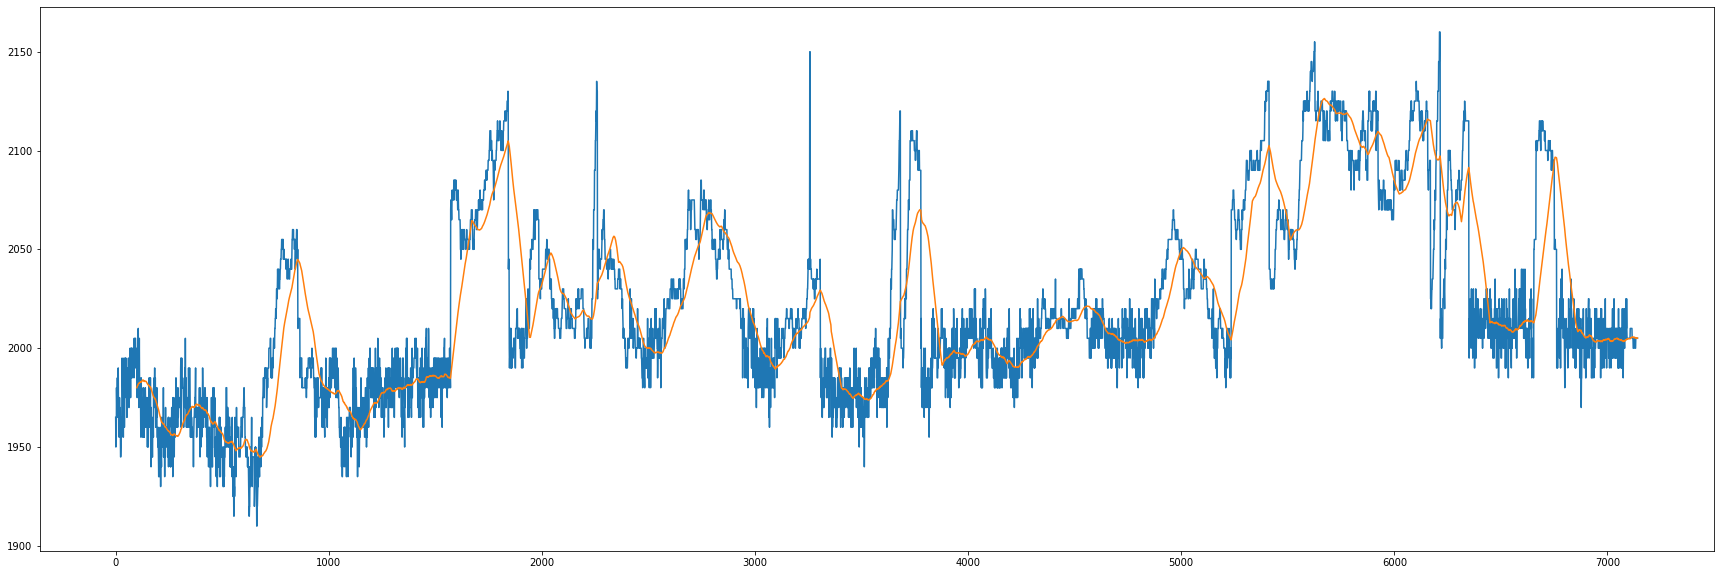

In [82]:
start.plot()
start.rolling(window = 100).mean().plot()

In [81]:
start.rolling(window = 100).mean()

0              nan
1              nan
2              nan
3              nan
4              nan
           ...    
7137   2005.200000
7138   2005.150000
7139   2005.100000
7140   2005.200000
7141   2005.150000
Length: 7142, dtype: float64